### Podatkovno rudarjenje, 1. domača naloga, 9. 3. 2018

# Priprava podatkov, osnovne statistike in vizualizacija

**Ime in priimek** **VPIŠI !!!** Nejc Rajšel, 63150233

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in prikaz
osnovnih statistik.

### Oddaja
Zapišite kodo in odgovore v spodnje celice. Tako pripravljen notebook shranite v vaš repozitorij za domače naloge na *github*. V učilnici oddajte le povezavo do notebooka v vašem repozitoriju, n.pr.: https://github.com/vašeuporabniškoime/PR18DNvz/dn1/poročilo.ipynb.

Za bolj podrobna navodila, glejte razdelek "Domače naloge" v [spletni učilnici predmeta](https://ucilnica.fri.uni-lj.si/course/view.php?id=37).

## Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**. Podatke naložite iz [spletne učilnice](https://ucilnica.fri.uni-lj.si/mod/resource/view.php?id=19230).

Iste podatke boste uporabili v vseh domačih nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5.  
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

In [123]:
# tu zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov,
# ki jih boste uporabi pri odgovarjanju na spodnja vprašanja

import pandas as pd
import matplotlib.image as img
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

castFile = pd.read_csv('ml-latest-small/cast.csv', sep=',')
linksFile = pd.read_csv('ml-latest-small/links.csv', sep=',')
moviesFile = pd.read_csv('ml-latest-small/movies.csv', sep=',')
ratingsFile = pd.read_csv('ml-latest-small/ratings.csv', sep=',')
tagsFile = pd.read_csv('ml-latest-small/tags.csv', sep=',')


## Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite po 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

In [233]:
# računanje povprečja
ratingOnly = ratingsFile.groupby(['movieId', 'rating']).sum().reset_index().groupby('movieId').mean().iloc[:,:1]

ratingOnly = ratingOnly.sort_values(by='rating', ascending=False)[:320] # index <= 315 ==> vsi ocene 5
print(ratingOnly)

rating = ratingsFile.groupby(['movieId', 'rating']).sum().reset_index().groupby('movieId').mean().reset_index()
rating = rating[['rating']]

ratingColumn = rating


         rating
movieId        
163949     5.00
7574       5.00
26094      5.00
120805     5.00
4755       5.00
121126     5.00
4731       5.00
122888     5.00
4724       5.00
4717       5.00
4711       5.00
84414      5.00
7564       5.00
50703      5.00
4591       5.00
126430     5.00
127052     5.00
127108     5.00
83411      5.00
83359      5.00
83318      5.00
4632       5.00
4626       5.00
82608      5.00
4617       5.00
51471      5.00
49280      5.00
4789       5.00
4796       5.00
26150      5.00
...         ...
2880       5.00
3580       5.00
3281       5.00
3575       5.00
3837       5.00
3737       5.00
59273      5.00
3757       5.00
3165       5.00
2897       5.00
3851       5.00
67504      5.00
69761      5.00
160590     5.00
3202       5.00
150856     5.00
147037     5.00
3038       5.00
9010       5.00
4114       5.00
59392      5.00
140265     5.00
162542     5.00
57038      5.00
74089      5.00
86000      4.75
7700       4.75
7459       4.75
73587      4.75
3966    

In [207]:
# izpis najboljše ocenjenih filmov
rating = rating.sort_values(by='rating', ascending=False)[:10]
rating['movieId'] = rating['movieId'].replace(moviesFile.set_index('movieId')['title'])

rating.columns = ['Movie Title', 'Rating']
print(rating)


                                            Movie Title  Rating
9065  The Beatles: Eight Days a Week - The Touring Y...     5.0
5173              Maborosi (Maboroshi no hikari) (1995)     5.0
5716                       Eclisse, L' (Eclipse) (1962)     5.0
8735  Robin Williams: Weapons of Self Destruction (2...     5.0
3727                            Wish Upon a Star (1996)     5.0
8738                                     The Car (1977)     5.0
3707                                   Innocence (2000)     5.0
8746                                     Ben-hur (2016)     5.0
3703                                 On the Edge (2001)     5.0
3696         Battle Creek Brawl (Big Brawl, The) (1980)     5.0


**Odgovor:** Težava je v tem ker je več filmov z oceno 5.0 kot 10 in nemoremo vedeti katerih je top 10, teh je natančno 315. Morda je težava tudi v tem, da je preveč filmov z oceno 5.0, saj je morda te filme ocenilo manj ljudi, zato je posledično tudi povprečna ocena filma premalo natančna. To težavo bi lahko rešili tako, da bi filme ocenjevalo čim večje število ljudi.

### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

In [243]:
# izpis vseh žanrov
genres = moviesFile['genres'].str.split('|')
setGenres = set()

for line in genres:
    for genre in line:
        if(genre not in setGenres and genre != '(no genres listed)'):
            setGenres.add(genre)

print('To so vsi žanri:')
for genre in setGenres:
    print(genre)


To so vsi žanri:
Drama
Documentary
Western
Fantasy
Crime
Adventure
Children
Musical
Comedy
Romance
Film-Noir
Thriller
Horror
Sci-Fi
IMAX
Animation
War
Mystery
Action


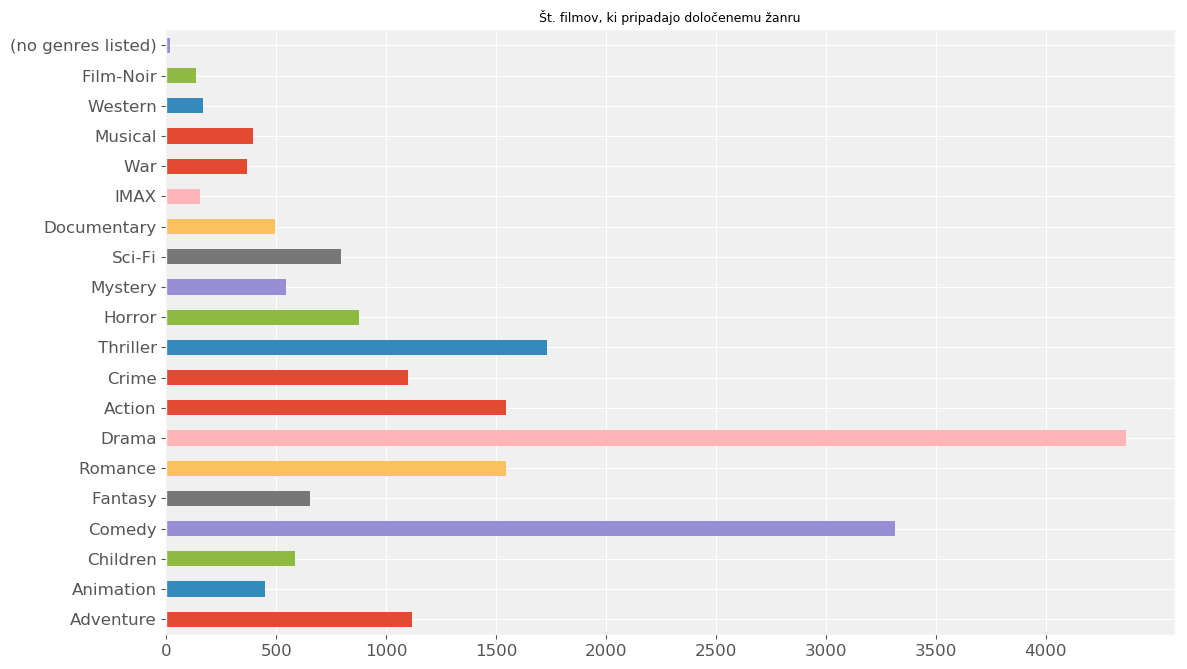

In [197]:
# vizualizacija števila filmov, ki pripadajo določenim žanrom
dictGenres = {}
for line in genres:
    for genre in line:
        if not genre in dictGenres:
            dictGenres[genre] = 1
        else:
            dictGenres[genre] += 1
        
#print(dictGenres)
dfGenres  = pd.Series(dictGenres, index=dictGenres.keys())

#print(dfGenres)

dfGenres.plot(kind='barh', figsize=(13, 8), fontsize=12, title='Št. filmov, ki pripadajo določenemu žanru', 
             xticks=(0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000))

**Odgovor:** Vseh žanrov je 19.

### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

In [242]:
ratings = ratingsFile.groupby(['movieId']).count().reset_index()
ratings = ratings[['movieId', 'userId']]

ratings = ratings.join(ratingColumn)

ratings.columns = ['Movie ID', 'Num. of ratings', 'Rating']

print(ratings[:20])


    Movie ID  Num. of ratings    Rating
0          1              247  3.000000
1          2              107  3.250000
2          3               59  2.750000
3          4               13  2.200000
4          5               56  3.187500
5          6              104  3.187500
6          7               53  2.714286
7          8                5  3.333333
8          9               20  3.000000
9         10              122  3.000000
10        11               82  3.000000
11        12               18  3.083333
12        13                8  3.800000
13        14               31  3.333333
14        15               11  2.500000
15        16               88  3.187500
16        17               86  3.187500
17        18               26  2.812500
18        19               92  2.750000
19        20               13  2.714286


**Odgovor:** Povezave med gledanostjo (št. ocen - ogledov) in povprečno oceno ni, saj večje število ocen ne pomeni boljše povprečne ocene. Večje število ogledov pomeni bolj natančno (realno) povprečno oceno.

### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

In [6]:
# kodo lahko razdelite v več celic

**Odgovor:** 

### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

In [7]:
# kodo lahko razdelite v več celic

**Odgovor:** 

### bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

**Odgovor:** Moj najljubši film je Megan Leavey, saj se celoten film vrti okoli punce, ki je bila izločena iz družne in si želi postati vojakinja. Ko pa pride v vojsko ima pa željo postati vodnik za psa, ki išče razna eksplozivna sredstva. Ko se ji želje uresničijo jo pošlejo na misijo z psom. Tam v enem od preizkovanj pride do eksplozije mine in v tej eksploziji sta poškodovana ona ter njen pes. Ker se je skozi ure treninga s tem psom tudi na njega navezala, se kmalu po okrevanju odloči, da misije za njo niso več "zanimive". Po upokojitvi hoče dobiti skrbništvo za njenega psa pa tega nemore dobiti, saj pes še ni bil dovol star za pokoj in pa tudi naj bi bil preveč nevaren (napadalen) za civilno življenje. Ko to izve se bori na vse moči, da bi ga pridobila in na koncu ji to res rata. Film se me je resnično dotaknil, ker ko sem prvič gledal ta film sem tudi sam trpel za izgubo psa, ki je bil iste pasme kot pes v filmu. Film je tudi posnet po resničnih dogodkih. 

## Zapiski
Za nalaganje podatkov lahko uporabite vgrajen modul `csv`. Mapa s podatki `ml-latest-small` se v tem primeru mora nahajati v isti mapi kot notebook.

In [8]:
from csv import DictReader

reader = DictReader(open('ml-latest-small/ratings.csv', 'rt', encoding='utf-8'))
for row in reader:
    user = row["userId"]
    movie = row["movieId"]
    rating = row["rating"]
    timestamp = row["timestamp"]

Podatki v zadnji vrstici datoteke:

In [9]:
user, movie, rating, timestamp

('671', '6565', '3.5', '1074784724')

Pretvorba časovnega formata (*Unix time*). Kode za oblikovanje so navedene v dokumentaciji modula [`datetime`](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior).

In [10]:
from datetime import datetime

t = 1217897793 # Unix-time
ts = datetime.fromtimestamp(t).strftime('%Y-%m-%d %H:%M')
ts

'2008-08-05 02:56'